In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
train = pd.read_csv("Train_UWu5bXk.csv")
test = pd.read_csv("Test_u94Q5KV.csv")
data = pd.concat([train, test])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print(train.shape)
print(test.shape)
data.shape 

(8523, 12)
(5681, 11)


(14204, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


Above output shows some values missing in Item_Weight and Outlet_Size.

Item_Outlet_Sales has some values missing becoz of test data which does not have that column.

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Above - Some of features are categorical data having datatype object.

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#checking for number of missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [5]:
#Item_Weight is numerical feature, so imputing it with median which is more robust
data['Item_Weight'] = data['Item_Weight'].fillna(data["Item_Weight"].median())
data['Item_Weight']

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [6]:
#using 'Other' in place of missing  value in outlet size
data['Outlet_Size'] = data['Outlet_Size'].fillna('Other')

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [9]:
#rename values of item fat content
data['Item_Fat_Content'].replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace = True)

In [10]:
#checking
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [11]:
#replacing  0 with median in Item_Visibility
data['Item_Visibility'].replace(0, data['Item_Visibility'].median(), inplace = True)

In [12]:
#checking
data[data['Item_Visibility']==0].shape    

(0, 12)

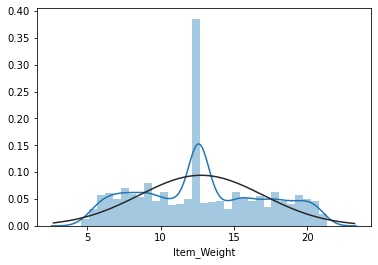

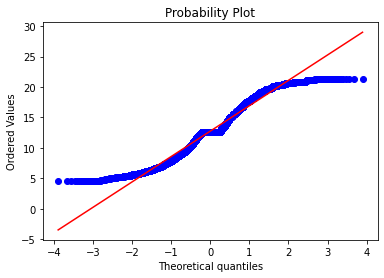

In [17]:
from scipy import stats
from scipy.stats import norm, skew
#histogram and normal probability plot
sns.distplot(data['Item_Weight'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['Item_Weight'], plot=plt)

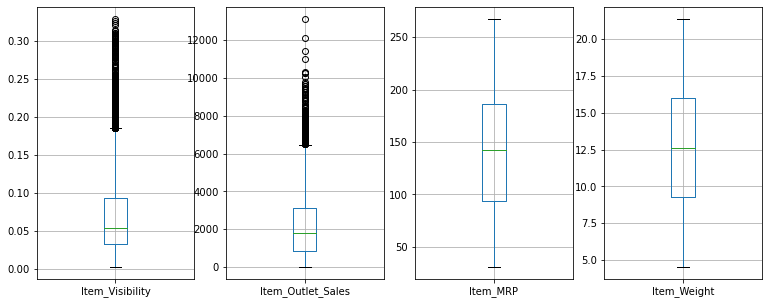

In [18]:
fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(141)
data.boxplot(column = 'Item_Visibility')
ax2 = fig.add_subplot(142)
data.boxplot(column = 'Item_Outlet_Sales')
ax3 = fig.add_subplot(143)
data.boxplot(column = 'Item_MRP')
ax4 = fig.add_subplot(144)
data.boxplot(column = 'Item_Weight')

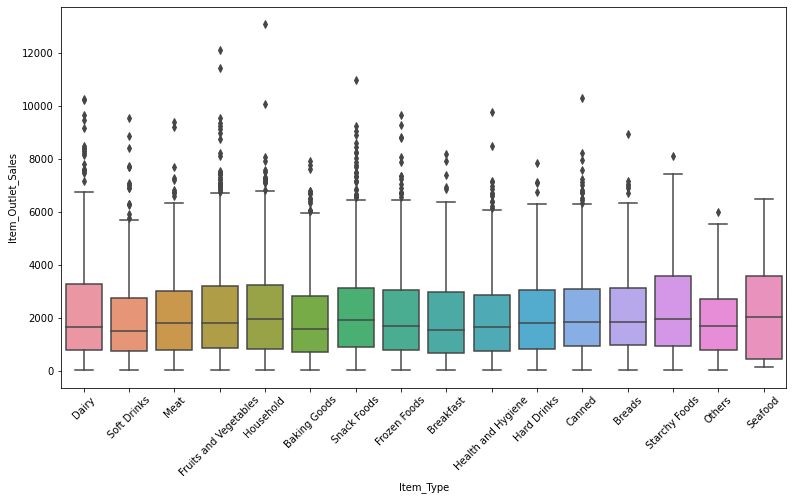

In [19]:

out = pd.concat([data['Item_Outlet_Sales'], data['Item_Type']], axis=1)
f, ax = plt.subplots(figsize=(13, 7))
fig = sns.boxplot(x='Item_Type', y="Item_Outlet_Sales", data=out)
plt.xticks(rotation=45)
plt.show()
# fig.axis(ymin=0, ymax=800000);

There are many outliers but some must be deleted(outlet sales >10000) which we will do afterwards.

In [20]:
# #deleting outliers
# data = data.drop(data[data["Item_Outlet_Sales"]>10000].index)
# print(data.shape)

# #checking again
# out = pd.concat([data['Item_Outlet_Sales'], data['Item_Type']], axis=1)
# f, ax = plt.subplots(figsize=(13, 7))
# fig = sns.boxplot(x='Item_Type', y="Item_Outlet_Sales", data=out)
# plt.xticks(rotation=45)
# plt.show()

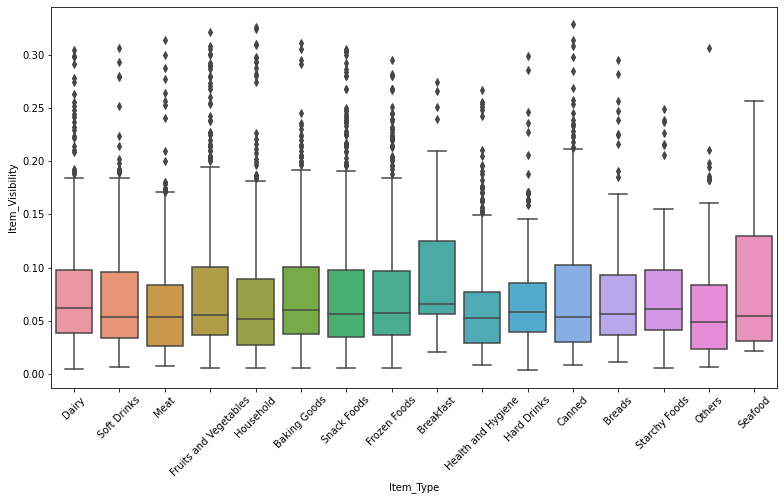

In [21]:
out1 = pd.concat([data['Item_Visibility'], data['Item_Type']], axis=1)
f1, ax1 = plt.subplots(figsize=(13, 7))
fig1 = sns.boxplot(x='Item_Type', y="Item_Visibility", data=out1)
plt.xticks(rotation=45)
plt.show()

# FEATURE ENGINEERING



In [13]:
## this new variable give more info about number of sales as more no. of outlets may have more no. of sales
#counting the no. of outlet identifiers
feat1 = data["Outlet_Identifier"].value_counts()
feat1

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [14]:
#data.iloc[0:len(train.index),:]

In [15]:
# Code by muskan mam
# Merging feat1 into data
data['Outlet_Count'] = ''
for elem, counts in feat1.items():
    '''so that it does not create missing values in item outlet sales as happening in merge()'''
    data['Outlet_Count'] = data.Outlet_Count.mask(data['Outlet_Identifier'].str.contains(str(elem)), counts)   
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Count'],
      dtype='object')

In [16]:
#data.iloc[0:len(train.index),:]

In [17]:
## New feature Outlet_Year gives its existence time which tells us How much customers are loyal to it, giving some info about sales
data["Outlet_Year"] = 2013 - data["Outlet_Establishment_Year"]
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Count', 'Outlet_Year'],
      dtype='object')


In [18]:
# Code by Muskan mam
## new feature Item_Type_New 
# accessing Item_Identifier values starting two characters
item_id =[]
for i in data.Item_Identifier:
    item_id.append(str(i)[:2])  #string slicing
#make new column ITem_Type_New
data["Item_Type_New"] = item_id
#converting these values into Food, Drinks and Non_Consumable
item_type_new = []
for x in data.Item_Type_New:
    if x == "FD":
        item_type_new.append("Food")
    elif x == "DR":
        item_type_new.append("Drinks")
    else:
        item_type_new.append("Non-Consumable")
data["Item_Type_New"] = item_type_new

In [19]:
# Label Encoding feature Item_Fat_Content
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [20]:
#one hot encoding features item type new, outlet location, outlet size and outlet type.
data = pd.get_dummies(data, columns=['Outlet_Size','Outlet_Location_Type','Outlet_Type', 'Item_Type_New'])

# PREDICTIVE MODELING

In [21]:
#droping some features which are converted or are identifier variables
data = data.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis = 1)

In [22]:
#code from stackoverflow
# moving item outlet sales feature to last index
data = data[[c for c in data if c not in ['Item_Type_New_Non-Consumable', 'Item_Outlet_Sales']] 
       + ['Item_Type_New_Non-Consumable', 'Item_Outlet_Sales']]

In [23]:
# dividing the datasets after making data good to predict
new_train = data.iloc[0:len(train.index),:]
new_test = data.iloc[len(train.index):,:-1]

## Linear Regression

In [24]:
#importing library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold 

In [25]:
#spliting data
x_train = new_train.iloc[:, :-1]
y_train = new_train.iloc[:,-1]
x_test = new_test

In [ ]:
model1 = LinearRegression()
#Fit the model:  
model1.fit(x_train,y_train)   
#print R square value
print(f"R square score = {model1.score(x_train, y_train)}") 
#Make predictions on training set:  
y_pred1 = model1.predict(x_train) 
#print root mean square error   
print("RMSE value is =",np.sqrt(np.mean((y_train-y_pred1)**2)))
# #Print accuracy  
# accuracy = metrics.accuracy_score(predictions,y_train)  
# print("Accuracy : %s" % "{0:.3%}".format(accuracy))

R square score = 0.5634885127868476
RMSE value is = 1127.4013591778858


In [ ]:
#Fit the model:  
model1.fit(x_train,np.log(y_train))   
#print R square value
print(f"R square score = {model1.score(x_train, np.log(y_train))}")
#Make predictions on training set:  
y_pred1 = model1.predict(x_train) 
#print root mean square error   
print("RMSE value is =",np.sqrt(np.mean((y_train-y_pred1)**2)))

R square score = 0.7206051057434961
RMSE value is = 2763.320510758473


## Decision Tree

In [28]:
from sklearn import tree
# Create tree object
model2 = tree.DecisionTreeRegressor()
# Train the model2 using the training sets and check score
model2.fit(x_train, y_train)
#print r square score
print(f"R square score = {model2.score(x_train, y_train)}")
#Make predictions on training set:  
y_pred2 = model2.predict(x_train) 
#print root mean square error   
print("RMSE value is =",np.sqrt(np.mean((y_train-y_pred2)**2)))

R square score = 1.0
RMSE value is = 0.0


## Random Forest

In [29]:
#Import Library
from sklearn.ensemble import RandomForestRegressor
# Create Random Forest object
model3= RandomForestRegressor()
# Train the model3 using the training sets and check score
model3.fit(x_train, y_train)
#print r square score
print(f"R square score = {model3.score(x_train, y_train)}")
#Make predictions on training set:  
y_pred3 = model3.predict(x_train) 
#print root mean square error   
print("RMSE value is =",np.sqrt(np.mean((y_train-y_pred3)**2)))

R square score = 0.9386264140555483
RMSE value is = 422.73817195513897


In [30]:
# Making prediction with model having highest r square value i.e. 1.0
predictions = model2.predict(x_test)
test_df = pd.DataFrame({'Item_Identifier' : test["Item_Identifier"], "Outlet_Identifier" : test["Outlet_Identifier"], "Item_Outlet_Sales" : predictions})
test_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2930.1858
1,FDW14,OUT017,959.4178
2,NCN55,OUT010,1775.6886
3,FDQ58,OUT017,3209.1560
4,FDY38,OUT027,5359.6900
...,...,...,...
5676,FDB58,OUT046,2885.5772
5677,FDD47,OUT018,2181.1608
5678,NCO17,OUT045,964.0784
5679,FDJ26,OUT017,1306.2996
